In [1]:
# Khai báo thư viện
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.cluster import KMeans

print('Khai báo thư viện thành công')

Khai báo thư viện thành công


In [2]:
# Tạo tệp dữ liệu tên là data bằng pandas đọc dữ liệu đầu vào
data = pd.read_csv('Case_study_CarPrice_Assignment.csv')
data

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [3]:
# Dùng hàm shape kiểm tra cột và dòng, hàm dtypes kiểm tra kiểu dữ liệu của từng cột trong dữ liệu
print('Số dòng của data là:', data.shape[0], ', Số cột của data là:', data.shape[1])
print('Các kiểu dữ liệu của từng cột trong data:')
data.dtypes.to_frame()

Số dòng của data là: 205 , Số cột của data là: 26
Các kiểu dữ liệu của từng cột trong data:


,0
car_ID,int64
symboling,int64
CarName,object
fueltype,object
aspiration,object
doornumber,object
carbody,object
drivewheel,object
enginelocation,object
wheelbase,float64


In [4]:
# Tính giá trị thống kê của tất cả các biến định lượng trong DataFrame 
data.describe().T

,count,mean,std,min,25%,50%,75%,max
car_ID,205.0,103.000000,59.322565,1.00,52.00,103.00,154.00,205.00
symboling,205.0,0.834146,1.245307,-2.00,0.00,1.00,2.00,3.00
wheelbase,205.0,98.756585,6.021776,86.60,94.50,97.00,102.40,120.90
carlength,205.0,174.049268,12.337289,141.10,166.30,173.20,183.10,208.10
carwidth,205.0,65.907805,2.145204,60.30,64.10,65.50,66.90,72.30
carheight,205.0,53.724878,2.443522,47.80,52.00,54.10,55.50,59.80
curbweight,205.0,2555.565854,520.680204,1488.00,2145.00,2414.00,2935.00,4066.00
enginesize,205.0,126.907317,41.642693,61.00,97.00,120.00,141.00,326.00
boreratio,205.0,3.329756,0.270844,2.54,3.15,3.31,3.58,3.94
stroke,205.0,3.255415,0.313597,2.07,3.11,3.29,3.41,4.17


## 1. Tiền xử lý dữ liệu
- 1 Kiểm tra dữ liệu khuyết thiếu trong data

In [5]:
# dùng for qua để kiểm tra từng cột xem có cột nào có chứa dữ liệu khuyết thiếu
flag = False
for index, column in enumerate(data.columns):
    temp = data[column].isna()
    if temp.sum() > 0:
        print('Cột', data.columns[index], 'chứa' , temp.sum() , 'giá trị KT')
        flag = True
if not flag:
    print('Thông qua kiểm tra thì chúng ta có thể thấy là data không có dữ liệu khuyết thiếu nào.')


Thông qua kiểm tra thì chúng ta có thể thấy là data không có dữ liệu khuyết thiếu nào.


- 2 Tìm mối liên hệ giữa hãng xe và tên xe, phát hiện và sửa sai dữ liệu

In [6]:
# Tách cột dữ liệu có kiểu chuỗi
car_company_name = data['CarName'].str.split()

# Lấy chuỗi kí tự đầu trong 1 list của biến car_company_name
name = car_company_name.str[0]

# Tạo cột car_company_name(Tên hãng xe) vào vị trị thứ 2 sau cột symboling bằng hàm insert
data.insert(2,'car_company_name',name)

# Tạo biến để kiểm tra tên hãng và số lượng
test = data['car_company_name'].unique()
test

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

- Thông qua kiểm tra chúng ta có thể thấy có rất nhiều tên hãng xe bị sai.
  - maxda bị sai tên đổi thành mazda
  - Nissan chúng ta có thể đổi về nissan để đồng bộ dữ liệu không viết hoa
  - porcshce tên bị sai đổi thành porsche
  - toyouta tên bị sai đổi thành toyota
  - vokswagen và vw tên bị sai đổi thành volkswagen

In [7]:
# Dùng Hàm replace để thay đổi tên bị sai
data['car_company_name'].replace({'vw':'volkswagen','vokswagen':'volkswagen','Nissan':'nissan',
                                  'toyouta':'toyota','maxda':'mazda','porcshce':'porsche'},inplace=True)

# Kiểm tra hàm replace có hoạt động và thay đổi còn bao nhiêu tên hãng sau khi xử lý
if len(test) == len(data['car_company_name'].unique()):
    print('Tên hãng bị sai tên chưa được sửa đổi,tên hãng còn lại:',len(test))
else:
    print('Tên hãng bị sai tên đã được sửa đổi,tên hãng còn lại:', len(data['car_company_name'].unique()))
    

Tên hãng bị sai tên đã được sửa đổi,tên hãng còn lại: 22


- 3-Xem xét kiểu dữ liệu của các thuộc tính, thực hiện chuyển đổi về đúng kiểu
    - Sau khi xem xét qua từng thuộc tính ta có thể thấy có 2 cột doornumber và cylindernumber ở dạng object ta có thể chuyển đổi về dạng int để có thể kiểm tra tính định lượng
        - Cột doornumber dữ liệu có  [four,two] ta có thể đổi về dạng int [4,2]
        - Cột cylindernumber dữ liệu có ['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'] ta có thể đổi về dạng int [ 4,  6,  5,  3, 12,  2,  8]

In [8]:
# Sửa cột doornumber
# dùng hàm Where của numpy thay đổi giá trị của cột doornumber
data['doornumber'] = np.where(data['doornumber'] == 'four',4,2)
print(data['doornumber'].value_counts())

4    115
2     90
Name: doornumber, dtype: int64


In [9]:
# Sửa cột cylindernumber
data['cylindernumber'].value_counts()

four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: cylindernumber, dtype: int64

In [10]:
# dùng select của numpy để thay đổi dữ liệu cột cylindernumber
condition = [(data['cylindernumber']=='two'),(data['cylindernumber']=='three'),(data['cylindernumber']=='four'),
             (data['cylindernumber']=='five'),(data['cylindernumber']=='six'),(data['cylindernumber']=='eight'),
             (data['cylindernumber']=='twelve')]
choices = [2,3,4,5,6,8,12]
data['cylindernumber'] = np.select(condition,choices)

# Kiểm tra lại xem sửa thông tin đã chính xác chưa
data['cylindernumber'].value_counts()

4     159
6      24
5      11
8       5
2       4
3       1
12      1
Name: cylindernumber, dtype: int64

- 4 Xử lý dữ liệu ngoại lai

In [11]:
# Lọc dữ liệu thuộc định lượng ra để xử lý ngoại lai nếu không sẽ báo lỗi 
df_Outliers = data.loc[:,['car_ID','symboling','doornumber','wheelbase','carlength','carwidth','carheight',
                'curbweight','cylindernumber','enginesize','boreratio','stroke','compressionratio','horsepower',
                'peakrpm','citympg','highwaympg','price']]

In [12]:
# Dùng  IQR Score để xử lý dữ liệu ngoại lai
Q1= df_Outliers.quantile(0.25)
Q3= df_Outliers.quantile(0.75)
IQR= Q3-Q1
df1 = df_Outliers[~((df_Outliers<(Q1-1.5*IQR))|(df_Outliers>(Q3+1.5*IQR))).any(axis=1)]
print(f'Sau khi loại bỏ dữ liệu ngoại lai thì data còn {data.shape[0]-(data.shape[0]-df1.shape[0])} dòng, các dòng bị loại bỏ này chủ yếu là các mẫu xe có thông số kỹ thuật đặc biệt\
 và có 1 số hãng thuộc phân khúc hạng sang và bảng dữ liệu có {data.shape[0]} dòng nếu xóa có thể ảnh hưởng nhiều đến bảng dữ liệu nên chúng ta không nên xóa.')

#các cột đã xóa sau khi xử lý dữ liệu ngoại lai
out_iqr = df_Outliers[((df_Outliers < (Q1 - 1.5 * IQR)) |(df_Outliers > (Q3 + 1.5 * IQR))).any(axis=1)]

Sau khi loại bỏ dữ liệu ngoại lai thì data còn 118 dòng, các dòng bị loại bỏ này chủ yếu là các mẫu xe có thông số kỹ thuật đặc biệt và có 1 số hãng thuộc phân khúc hạng sang và bảng dữ liệu có 205 dòng nếu xóa có thể ảnh hưởng nhiều đến bảng dữ liệu nên chúng ta không nên xóa.


# 2. Tiến hành phân tích mối liên hệ của từng thuộc tính với price bằng các biểu đồ mô tả tần số, tần suất, các phép kiểm định
- Tiến hành chia phân khúc các hãng xe làm 3 loại (High, Average, Low):
    - Lý do chia như này để ta có thể hiểu hơn vì sao các hãng thuộc High lại có giá bán cao hơn các hãng thuộc phân khúc khác hay vì sao các hãng thuộc Low lại có giá thấp hơn.

In [13]:
# Chia phân khúc ra làm 3 
Segmentation = data.loc[:,['CarName','price']].sort_values(by='price',ascending=False)
bins = [0,10000,20000,50000]
Segmentation = pd.cut(Segmentation['price'], bins).value_counts().to_frame()
# Vậy ta đã có số liệu của 3 hạng xe
Segmentation.rename(columns={'price':'Số lượng xe'})

,Số lượng xe
"(0, 10000]",100
"(10000, 20000]",79
"(20000, 50000]",26


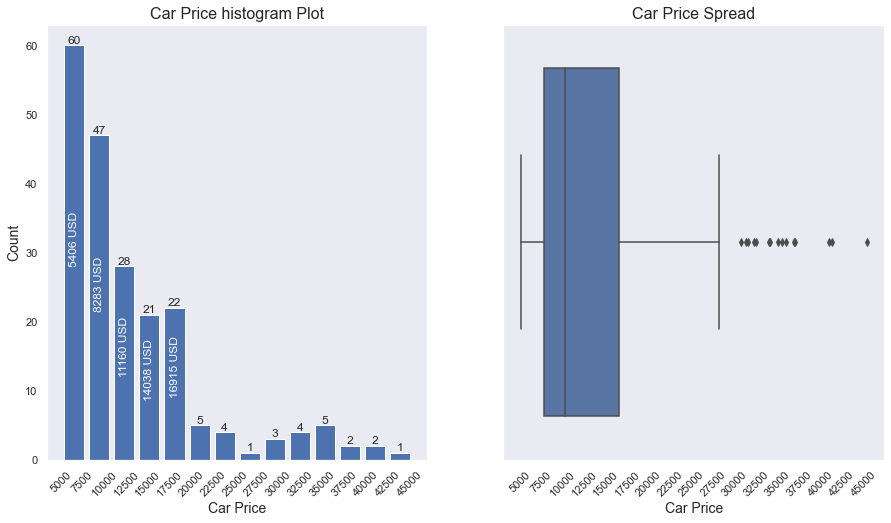

In [14]:
sns.set_theme(style = 'dark')

plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
plt.title('Car Price histogram Plot',fontsize = 16)
n, bins, patches = plt.hist(data.price,bins = 14,rwidth = 0.8,align='mid')
plt.xticks([i for i in range(5000,47500,2500)],rotation = 45)
plt.xlabel('Car Price',fontsize = 14)
plt.ylabel('Count',fontsize = 14)
for i in range(len(patches)):
    patch = patches[i]
    height = patch.get_height()
    v = patch.get_x()
    plt.text(patch.get_x() + patch.get_width()/2, height, str(int(height)), ha='center', va='bottom')
    if height>20:
        plt.text(patch.get_x() + patch.get_width()/2, height/2-2, str(int(round(v,0))) + ' USD',
        ha='center', va='bottom',rotation=90,color='White')

plt.subplot(1,2,2) 
plt.title('Car Price Spread',fontsize = 16) 
sns.boxplot(x=data.price)
plt.xticks([i for i in range(5000,47500,2500)],rotation = 45)
plt.xlabel('Car Price',fontsize = 14)
plt.show()

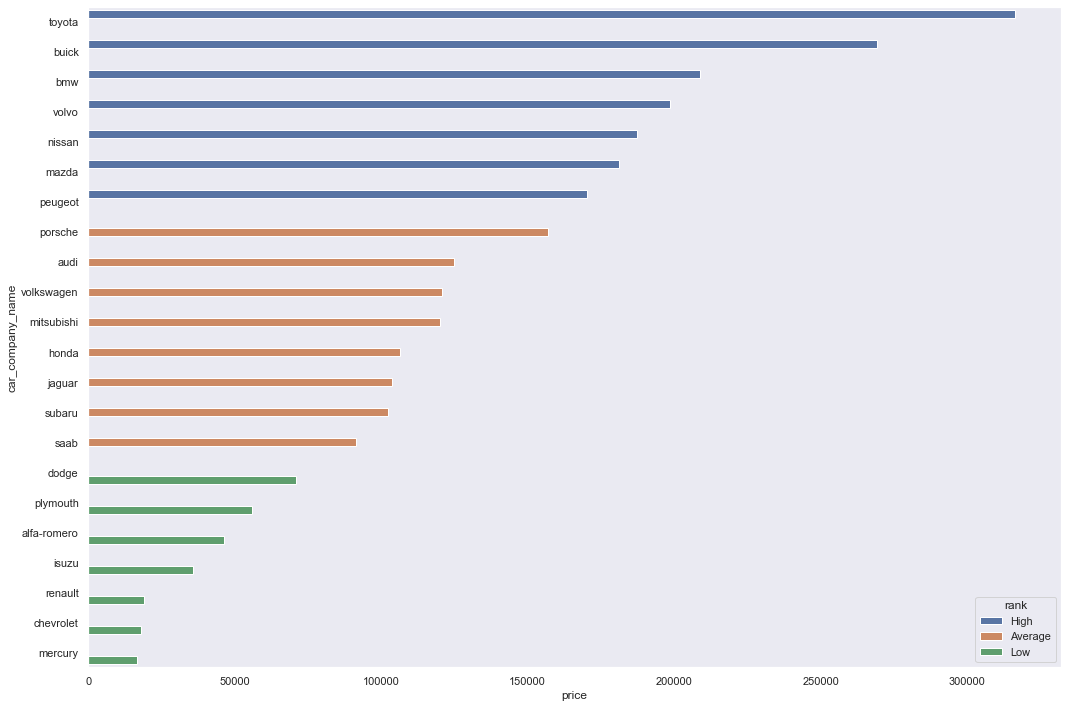

In [15]:
# Biểu đồ mối liên hệ Hãng với Price xem hãng nào có mức giá bán cao nhất
plt.figure(figsize=(15, 10))

# lọc cột car_company_name với tổng giá bằng groupby và sắp xếp lại bảng từ lớn xuống nhỏ
car_company_name_price = data.groupby('car_company_name')['price'].sum().sort_values(ascending=False).to_frame()

#
kmeans = KMeans(n_clusters = 3, random_state = 0).fit(np.array(car_company_name_price.price).reshape(-1,1))

# Phân loại hãng xe có mới giá bán 
car_company_name_price['rank'] = kmeans.labels_
car_company_name_price['rank'].replace(0,'Average',inplace=True)
car_company_name_price['rank'].replace(1,'High',inplace=True)
car_company_name_price['rank'].replace(2,'Low',inplace=True)

# Dựng biểu đồ
sns.barplot(x = car_company_name_price.price, y = car_company_name_price.index, orient = 'h', hue = car_company_name_price['rank'])
# sns.set(rc = {'figure.figsize':(15,5)})
plt.tight_layout()
plt.show()

- Các chỉ số trên tuy mức độ số lượng xe khác nhau nhưng ta có thể thấy các loại High và Average có rất nhiều hãng nổi tiếng với loại hãng hạng sang(BMW,Audi,Porsche) và hãng phổ biến(Toyota,Mazda,Honda,...) trên thế giới. các hãng còn lại ta có thể thấy là các hãng không phổ biến hay là loại sang nào.

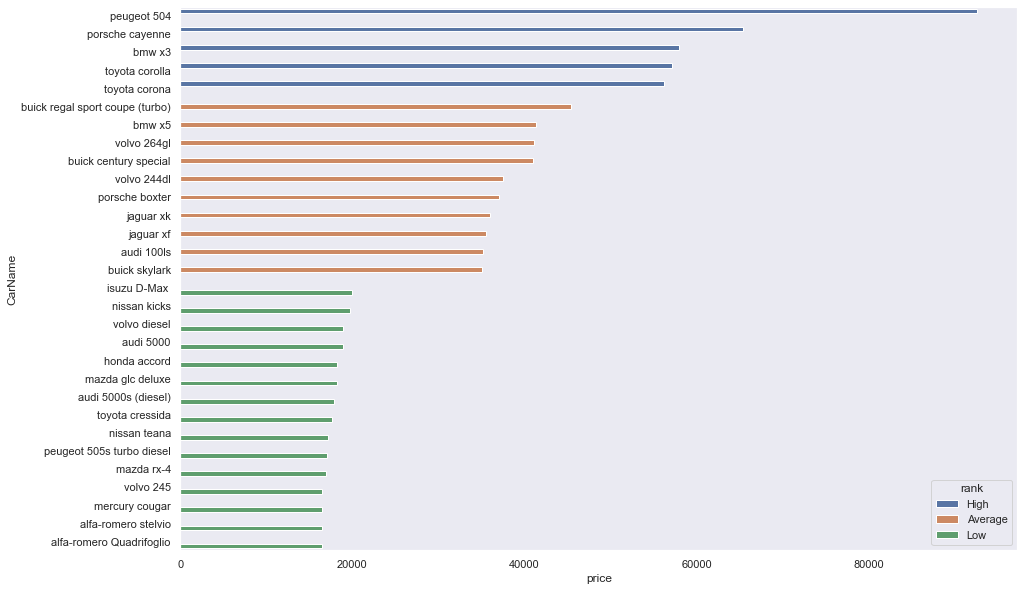

In [16]:
# Tạo data mới tổng hợp 5 loại bán chạy nhất, 10 loại trung bình, 15 loại kém
# lọc cột CarName với tổng giá bằng groupby và sắp xếp lại bảng từ lớn xuống nhỏ
price_name= data.groupby('CarName')['price'].sum().sort_values(ascending=False).to_frame()

#
kmeans = KMeans(n_clusters = 3, random_state = 0).fit(np.array(price_name.price).reshape(-1,1))

# Phân loại xe
price_name['rank'] = kmeans.labels_
price_name['rank'].replace(0,'Average',inplace=True)
price_name['rank'].replace(1,'Low',inplace=True)
price_name['rank'].replace(2,'High',inplace=True)

# lọc số lượng xe từ các phân khúc của data price_name
price_name1 = price_name[(price_name['rank']=='High')][:5]
price_name2 = price_name[(price_name['rank']=='Average')][:10]
price_name3 = price_name[(price_name['rank']=='Low')][:15]

# gộp các phân khúc lại thành 1 bảng
price_name4 = pd.concat([price_name1,price_name2,price_name3], axis=0)
# price_name4 = price_name4.sort_values(by='price',ascending=False)

# Dựng biểu đồ
plt.figure(figsize=(15, 10))
price_name4['rank'].replace(0,'Low',inplace=True)
price_name4['rank'].replace(1,'High',inplace=True)
price_name4['rank'].replace(2,'Average',inplace=True)
sns.barplot(x = price_name4.price, y = price_name4.index, orient = 'h', hue = price_name4['rank'])
# plt.tight_layout()
plt.show()

- Qua biểu đồ Hãng xe và loại Xe ta có thể thấy hãng xe top đầu cũng không có đứng đầu ở biểu đồ loại Xe vì có nhiều yếu tố khác nhau ,cũng như cầu khác nhau của khách hàng 

# 2.1 Tiến hành phân tích mối liên hệ của từng thuộc tính với price bằng các biểu đồ mô tả tần số, tần suất, các phép kiểm định
- kiểm tra từng thuộc tính định lượng có tương quan với cột price bằng phương pháp kiểm định giả thuyết Pearsonr 

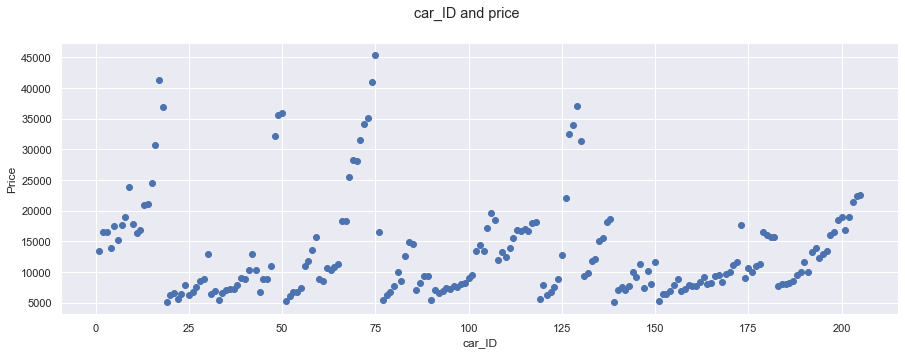

Thuộc tính car_ID và price không tương quang,với mức độ ý nghĩa là 0.05, r=-0.109, pvalue=0.119


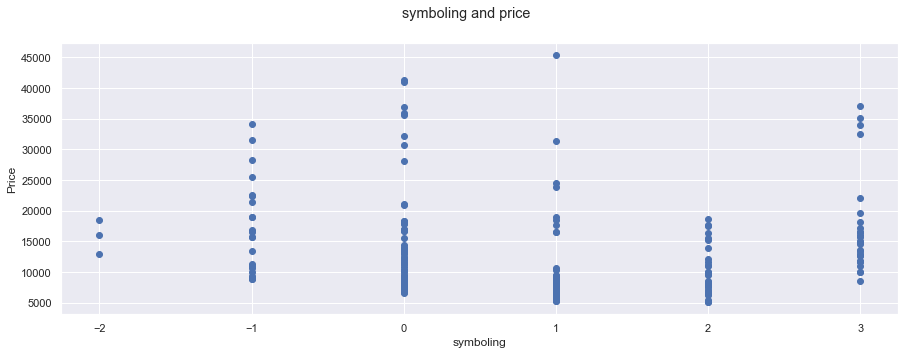

Thuộc tính symboling và price không tương quang,với mức độ ý nghĩa là 0.05, r=-0.080, pvalue=0.254


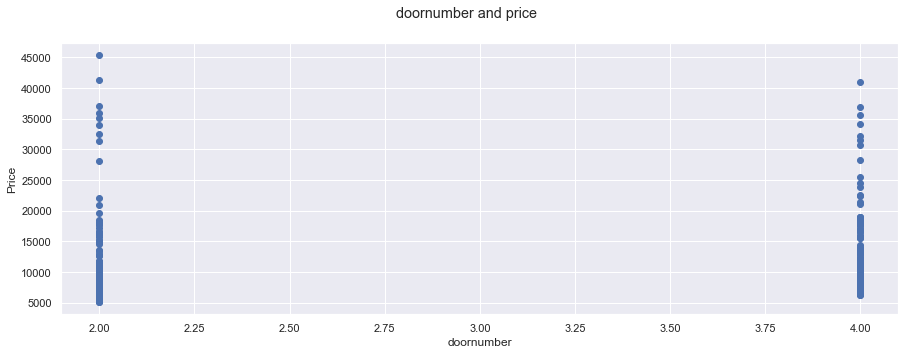

Thuộc tính doornumber và price không tương quang,với mức độ ý nghĩa là 0.05, r=0.032, pvalue=0.650


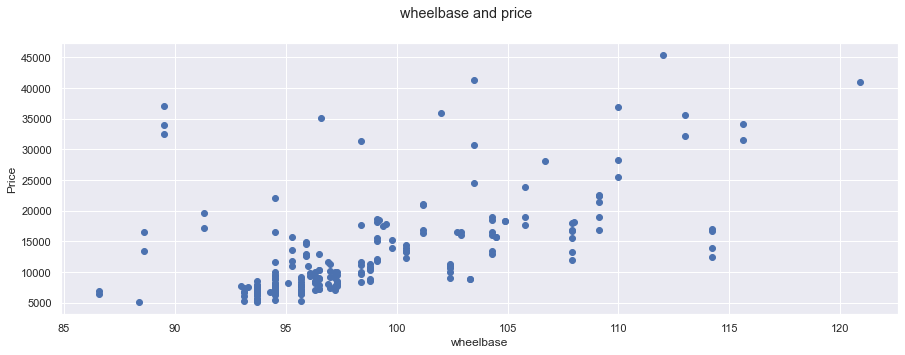

Thuộc tính wheelbase và price không tương quang,với mức độ ý nghĩa là 0.05, r=0.578, pvalue=0.000


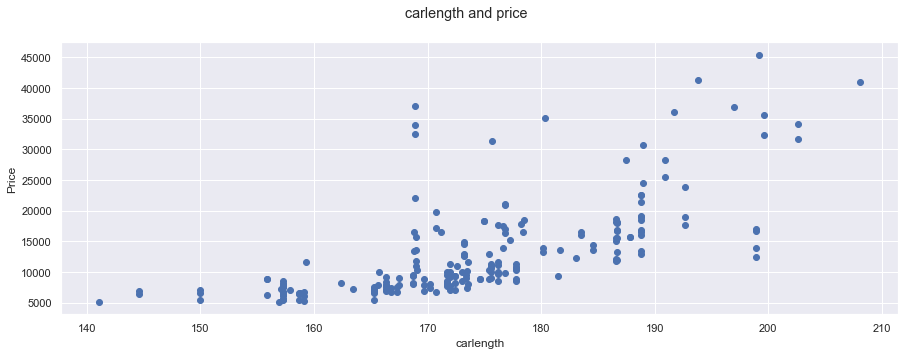

Thuộc tính carlength và price có tương quan tuyến tính,với mức độ ý nghĩa là 0.05, r=0.683, pvalue=0.000


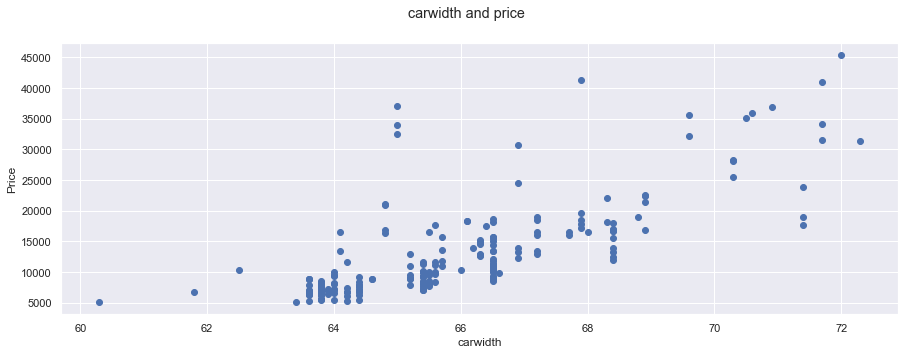

Thuộc tính carwidth và price có tương quan tuyến tính,với mức độ ý nghĩa là 0.05, r=0.759, pvalue=0.000


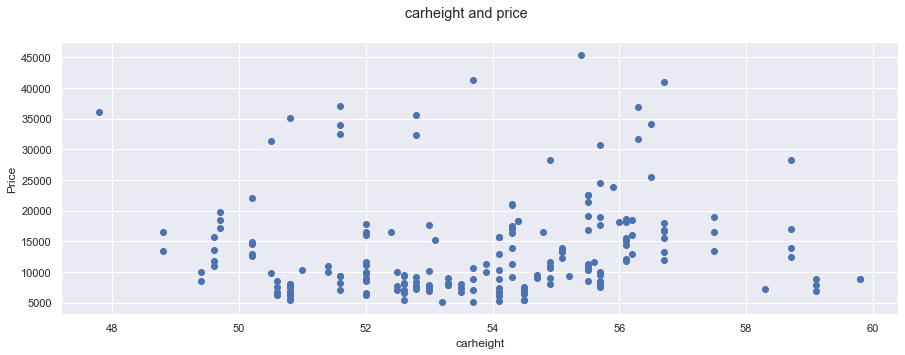

Thuộc tính carheight và price không tương quang,với mức độ ý nghĩa là 0.05, r=0.119, pvalue=0.088


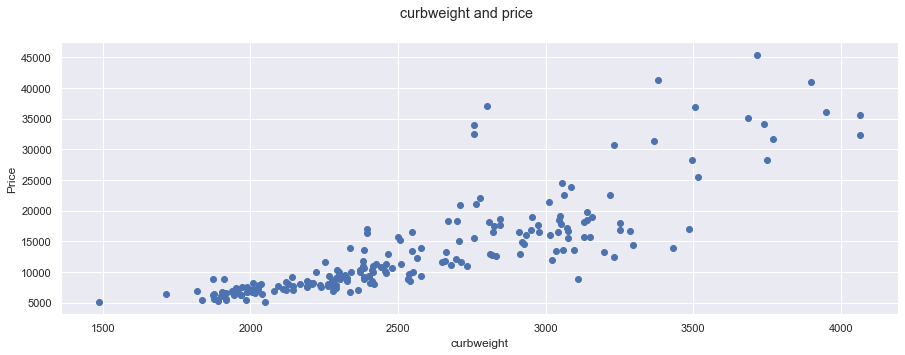

Thuộc tính curbweight và price có tương quan tuyến tính,với mức độ ý nghĩa là 0.05, r=0.835, pvalue=0.000


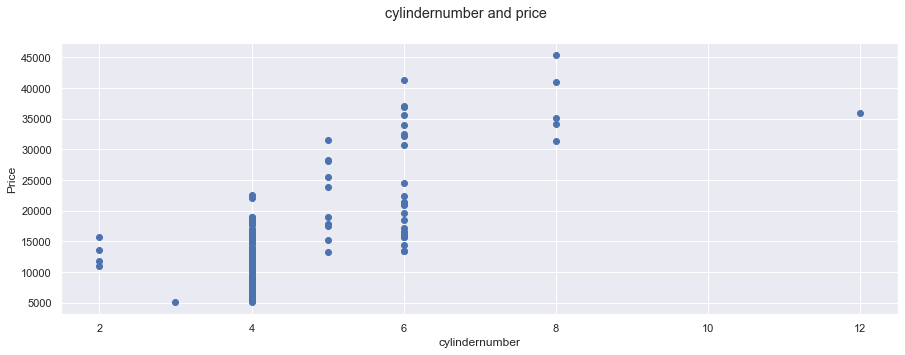

Thuộc tính cylindernumber và price có tương quan tuyến tính,với mức độ ý nghĩa là 0.05, r=0.718, pvalue=0.000


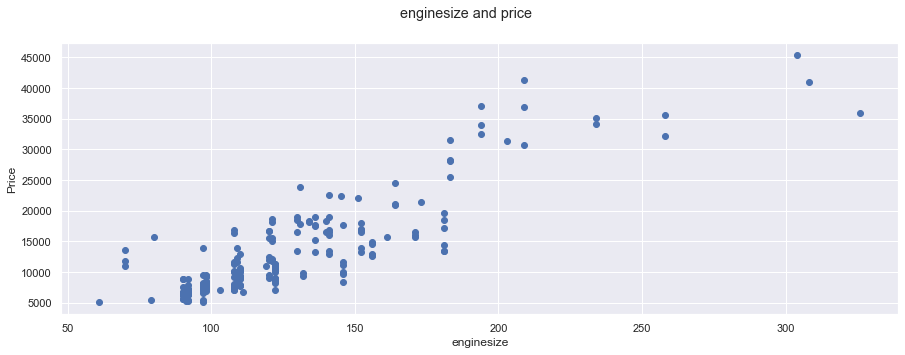

Thuộc tính enginesize và price có tương quan tuyến tính,với mức độ ý nghĩa là 0.05, r=0.874, pvalue=0.000


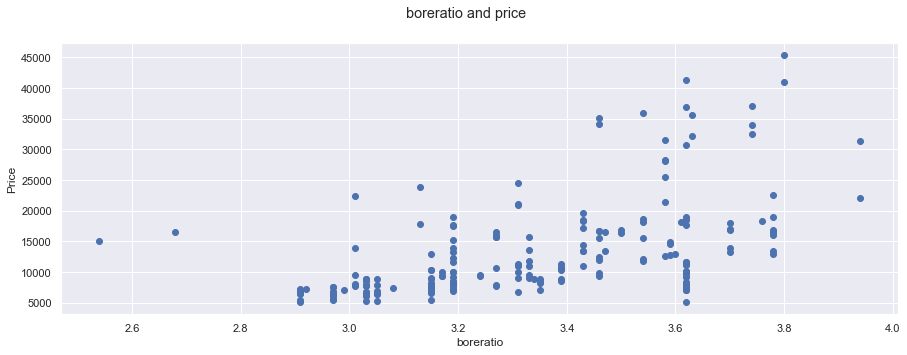

Thuộc tính boreratio và price không tương quang,với mức độ ý nghĩa là 0.05, r=0.553, pvalue=0.000


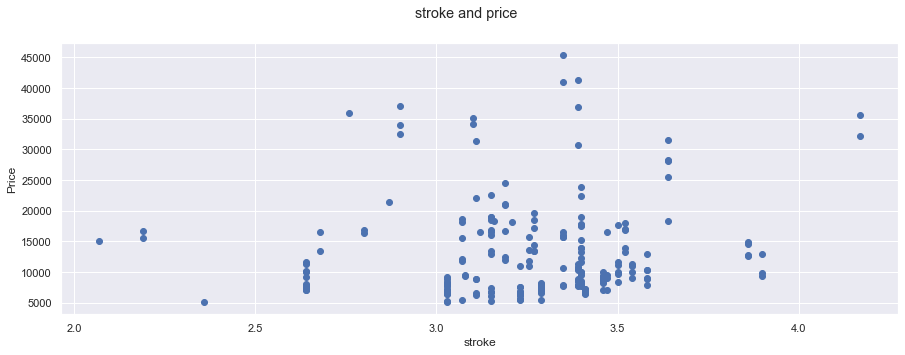

Thuộc tính stroke và price không tương quang,với mức độ ý nghĩa là 0.05, r=0.079, pvalue=0.258


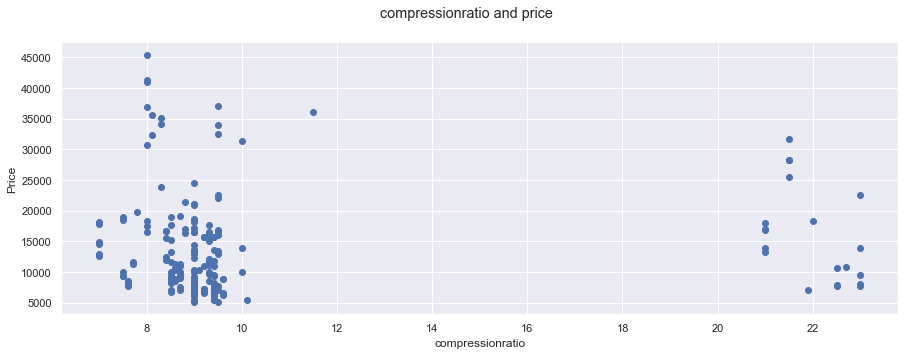

Thuộc tính compressionratio và price không tương quang,với mức độ ý nghĩa là 0.05, r=0.068, pvalue=0.333


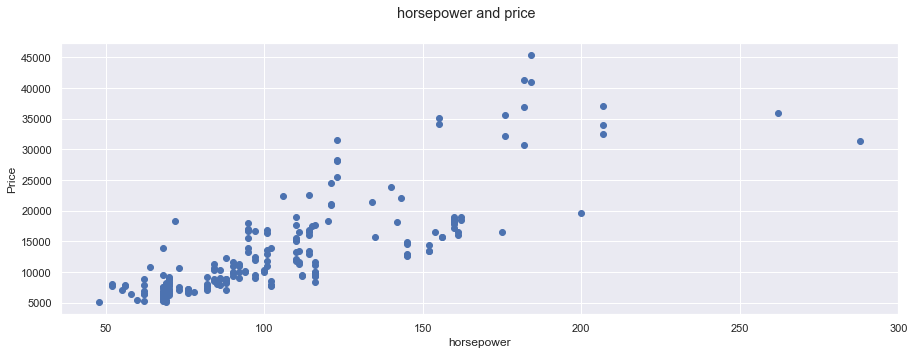

Thuộc tính horsepower và price có tương quan tuyến tính,với mức độ ý nghĩa là 0.05, r=0.808, pvalue=0.000


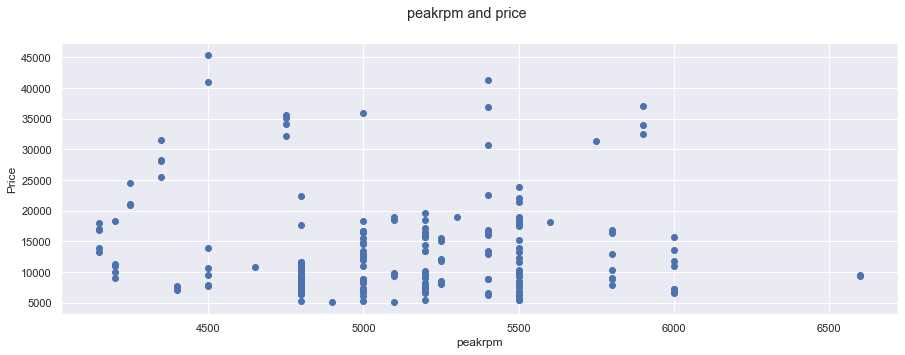

Thuộc tính peakrpm và price không tương quang,với mức độ ý nghĩa là 0.05, r=-0.085, pvalue=0.224


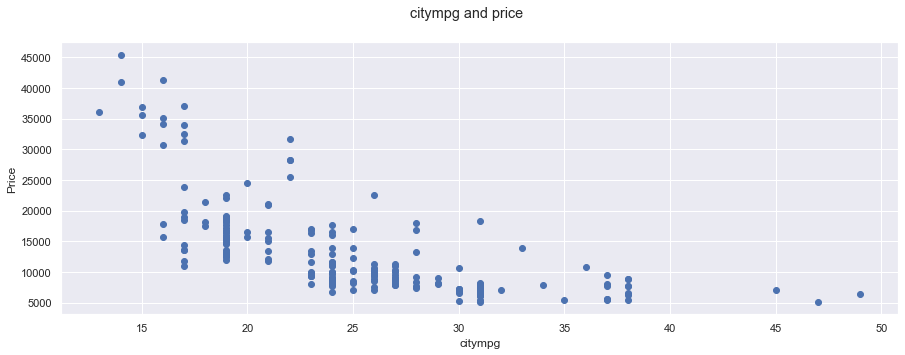

Thuộc tính citympg và price có tương quan đối xứng,với mức độ ý nghĩa là 0.05, r=-0.686, pvalue=0.000


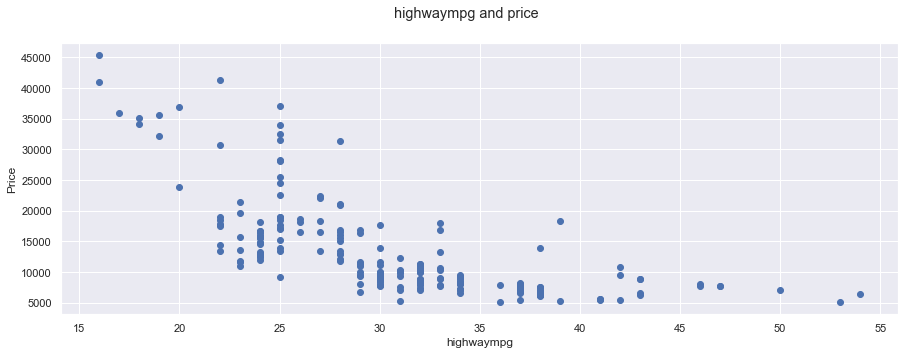

Thuộc tính highwaympg và price có tương quan đối xứng,với mức độ ý nghĩa là 0.05, r=-0.698, pvalue=0.000


<Figure size 1080x360 with 0 Axes>

In [38]:
# Dùng for kiểm tra từng thuộc tính định lượng có tương quan với cột price bằng phương pháp kiểm định giả thuyết Pearsonr
for i in data.columns:
    if data[f'{i}'].dtypes == 'float64' or data[f'{i}'].dtypes =='int64' or data[f'{i}'].dtypes =='int32':
        r, pvalue = stats.pearsonr(data[i], data['price'])
        plt.suptitle(f'{i} and price')
        if r >= 0.6 and i != 'price':
            plt.scatter(x=data[i], y= data['price'])
            plt.xlabel(i)
            plt.ylabel('Price')
            plt.show()
            print(f'Thuộc tính {i} và price có tương quan tuyến tính,với mức độ ý nghĩa là 0.05, r=%.3f, pvalue=%.3f' % (r, pvalue))
        elif r <= - 0.6 and i != 'price':
            plt.scatter(x=data[i], y= data['price'])
            plt.xlabel(i)
            plt.ylabel('Price')
            plt.show()
            print(f'Thuộc tính {i} và price có tương quan đối xứng,với mức độ ý nghĩa là 0.05, r=%.3f, pvalue=%.3f' % (r, pvalue))
        else:
            if i != 'price':
                plt.scatter(x=data[i], y= data['price'])
                plt.xlabel(i)
                plt.ylabel('Price')
                plt.show()
                print(f'Thuộc tính {i} và price không tương quang,với mức độ ý nghĩa là 0.05, r=%.3f, pvalue=%.3f' % (r, pvalue))

- Dùng vòng lặp và phương pháp kiểm định giá thuyết Pearsonr ta có 8 những cột trên có mức tương quan với Price:
    - carlength, carwidth, curbweight, cylindernumber, enginesize, horsepower, citympg, highwaympg với mức R >= 0.6
- Sau đó chúng ta xây dựng thêm biểu đồ.
    -  Dùng biểu đồ scatter để thể hiện.
- Chọn lọc ra 4 chỉ số cao nhất và price để đưa vào mô hình đoán gia.
    - carwidth, curbweight, enginesize, horsepower
    - Dùng mô hình dữ báo kiểu mới pipeline

# Mô hình 

In [18]:
df_model1 = data.loc[:,['price', 'carwidth','curbweight','enginesize','horsepower']]

#Xây dựng mô hình dự báo:
#Chia ngẫu nhiên dữ liệu quan sát được thành hai phần dữ liệu huấn luyện và dữ liệu kiểm tra
from sklearn.model_selection import train_test_split

train, test = train_test_split(df_model1, train_size = 0.8, test_size=0.2)

#Sử dụng pipeline (kiểu mới)
#Tạo chuẩn hóa
from sklearn.preprocessing import StandardScaler
zscore = StandardScaler(with_mean=False)

#Tạo model Linear Regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()

#Tạo pipeline
from sklearn.pipeline import Pipeline
pipeline = Pipeline([("StandardScaler", zscore),
                     ("linear_regression", model)])

#Xây dựng mô hình hồi quy tuyến tính đa biến với biến dự báo là price
#các biến đầu vào là các thông số kỹ thuật còn lại  đến price

X_train = train.drop(columns=['price'])
y_train = train.loc[:,'price']

#Fit
pipeline.fit(X_train,y_train)

#Predict
y_ = pipeline.predict(test.drop(columns=['price']))

#Tính r2score
import sklearn.metrics as metrics
print(metrics.r2_score(test.loc[:,'price'], y_))

0.8651008751654817


# Tạo biểu đồ các giá trị định tính

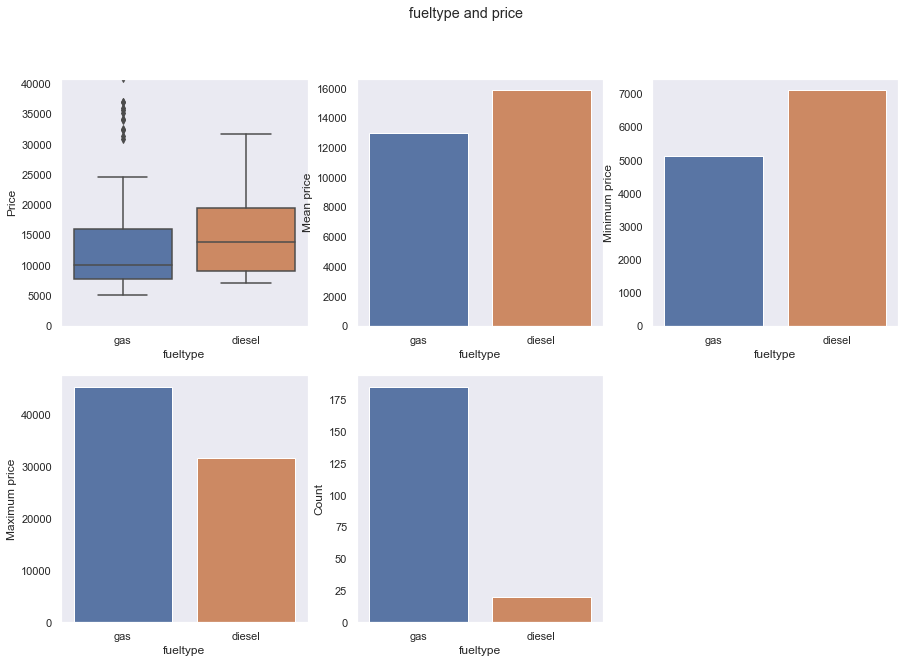

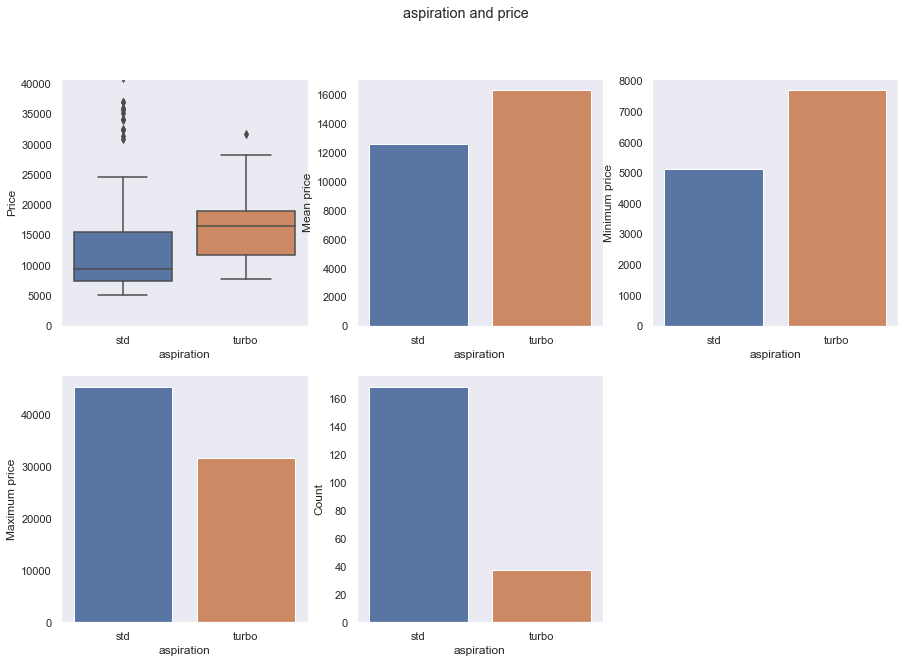

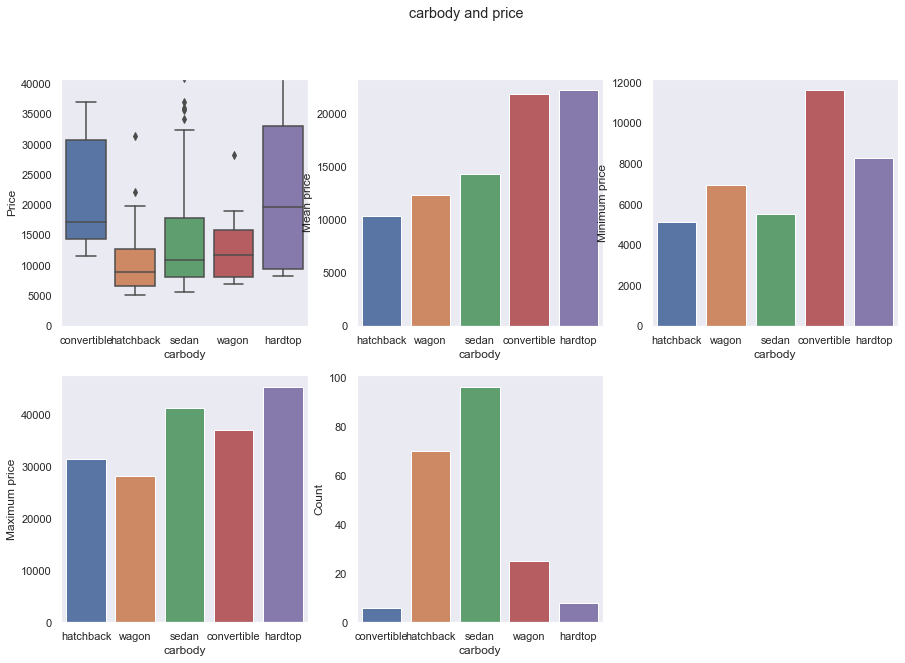

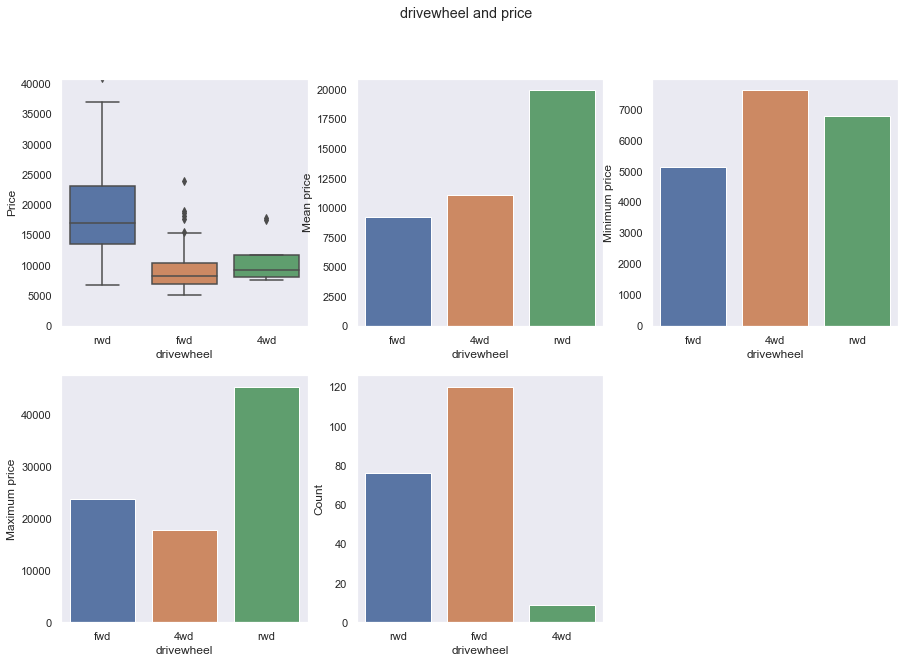

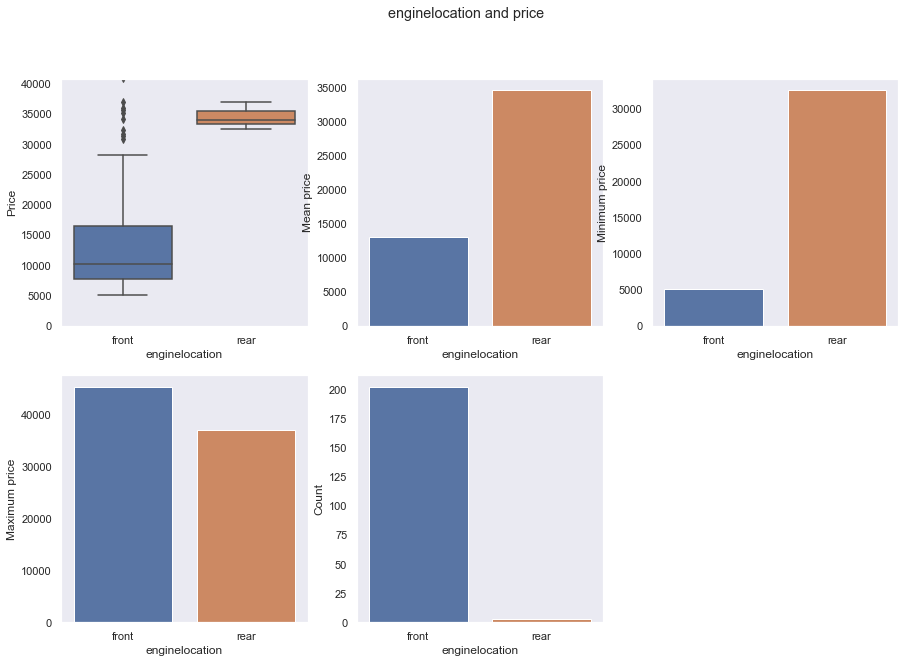

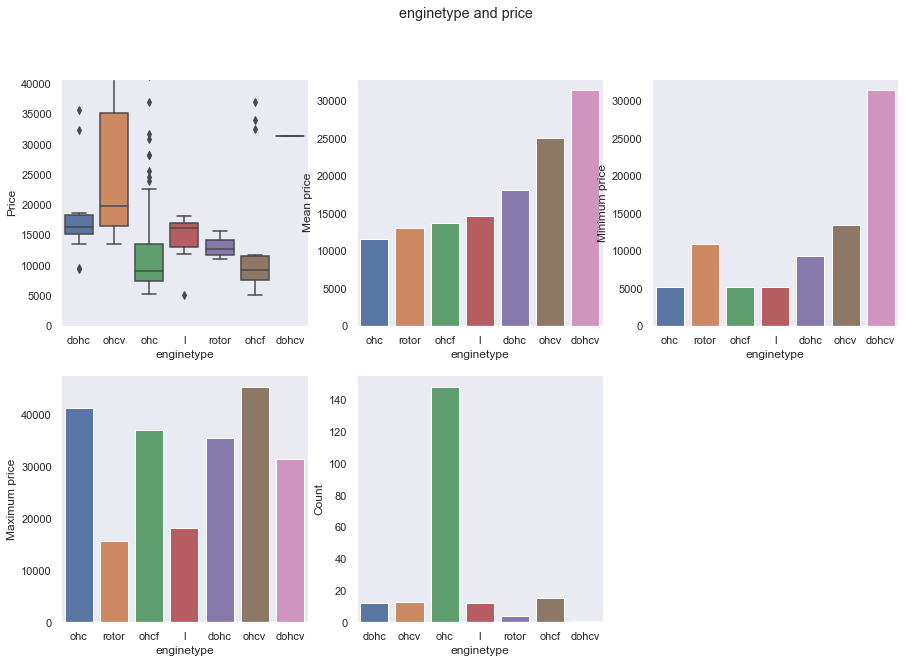

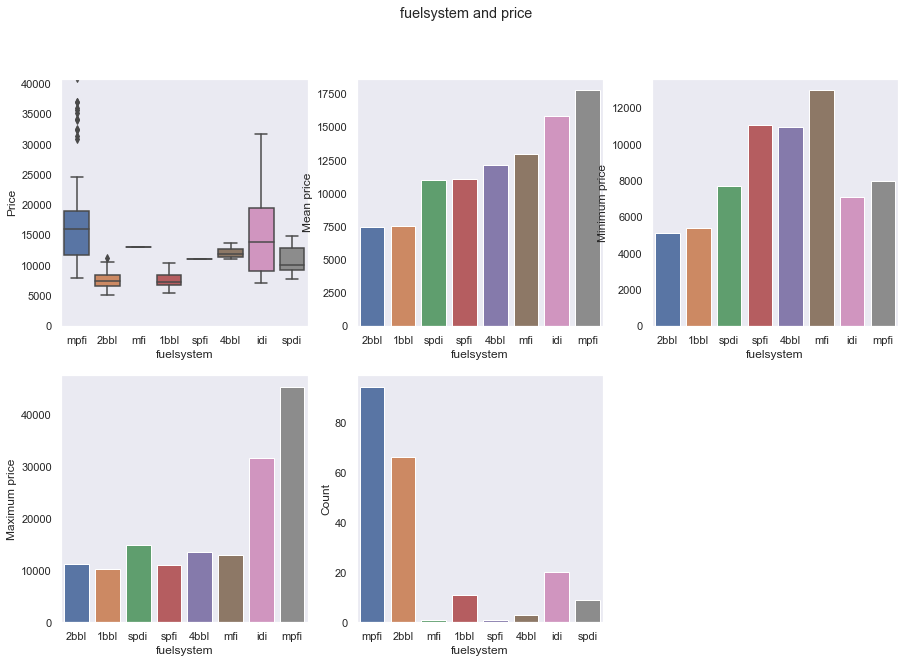

In [19]:
def plot_categorical_features(data, feature):
    plt.figure(figsize=(15, 10))
    plt.suptitle(f'{feature} and price')
     
    # Box plot
    ax2 = plt.subplot(2,3,1)
    sns.boxplot(data=data, x=feature, y='price')
    plt.ylim(0, data['price'].quantile(0.99))
    plt.xlabel(feature)
    plt.ylabel('Price')
    
    # Bar plot for mean price
    ax3 = plt.subplot(2,3,2)
    sns.barplot(data=data, x=feature, y='price', estimator=np.mean, ci=None, order=data.groupby(feature)['price'].mean().sort_values().index)
    plt.xlabel(feature)
    plt.ylabel('Mean price')
    
    # Bar plot for minimum price
    ax4 = plt.subplot(2,3,3)
    sns.barplot(data=data, x=feature, y='price', estimator=np.min, ci=None, order=data.groupby(feature)['price'].mean().sort_values().index)
    plt.xlabel(feature)
    plt.ylabel('Minimum price')
    
    # Bar plot for maximum price
    ax5 = plt.subplot(2,3,4)
    sns.barplot(data=data, x=feature, y='price', estimator=np.max, ci=None, order=data.groupby(feature)['price'].mean().sort_values().index)
    plt.xlabel(feature)
    plt.ylabel('Maximum price')
    
    # Bar plot for count
    ax6 = plt.subplot(2,3,5)
    sns.countplot(data=data, x=feature)
    plt.xlabel(feature)
    plt.ylabel('Count')

    plt.show()
for feature in data.select_dtypes(include=['object']).columns:
    if feature not in ['car_company_name', 'CarName']:
        plot_categorical_features(data, feature)

# 3. Nhận xét các thuộc tính gây ảnh hưởng tới giá
- Thông qua phân tích của phần 2 và mô hình thì ta có thể thấy những yếu tố hay thuộc tính ảnh hưởng đến giá:
    - Tên Hãng Xe
    - Thông tin chỉ số của Động cơ xe và mã lực của xe
    - Hệ thống nguyên liệu của xe,Số nguyên liệu tiêu hao của 1 xe trên nhiều chặng đường khác nhau
    - Ngoại hình xe, trọng lượng xe.

# 4. Vẽ biểu đồ heatmap biểu diễn mức độ tương quan giữa các biến định lượng (xem xét có những biến nào có tương quan lớn với nhau, chỉ giữa lại 1 trong các biến đó đưa vào mô hình)

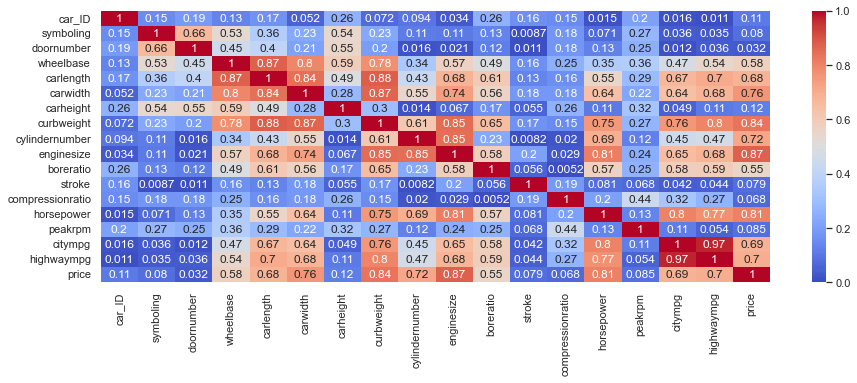

In [20]:
# Dùng hàm corr() tạo ma trận liên quan với các cột trong 1 tệp dữ liệu
Cata_corr = data.corr()
# np.abs sử dụng để tính ra trị tuyệt đối của ma trận corr
Cata_corr = np.abs(Cata_corr)

# Tạo Heatmap và chỉnh sửa biểu đồ dễ nhìn hơn.
sns.set(rc={'figure.figsize':(15,5)})
sns.heatmap(Cata_corr, vmax =1,vmin=0, cmap='coolwarm', annot = True)
plt.show()

R_square của citympg và highwaympg là: 0.9434956498266844


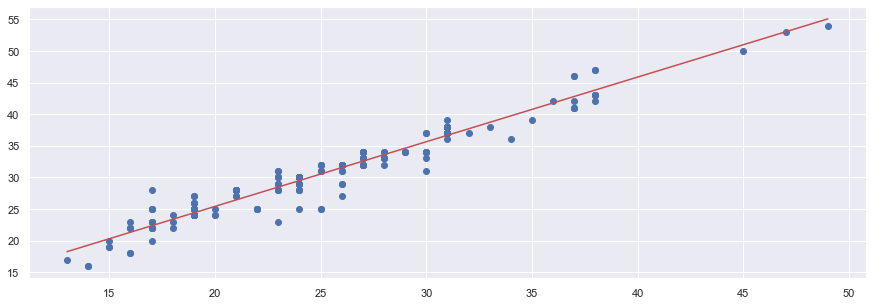

In [21]:
# Khai báo thư viện xây dựng mô hình
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error


# Sử dụng hồi quy tuyến tính một biến
# đưa biến sau khi chọn ở biểu đồ Heatmap
X = data['citympg']
y = data['highwaympg']

# Xây dựng mô hình LinearRegression
model = LinearRegression()
model.fit(X.values.reshape(-1,1), y.ravel())
predictions = model.predict(X.values.reshape(-1,1))

# Chỉ số R_square
print('R_square của citympg và highwaympg là:', model.score(X.values.reshape(-1,1), y))

# dựng biểu đồ với điểm dự đoán
plt.scatter(X, y)
plt.plot([min(X),max(X)], [min(predictions),max(predictions)], color='r')
plt.show()

In [22]:
# xây dựng mô hình với statsAPI.OLS
X = data['citympg'].values.reshape(-1,1)
y = data['highwaympg']

exog = sm.add_constant(X)
estimator = sm.OLS(y, exog).fit()

print(estimator.summary())

                            OLS Regression Results                            
Dep. Variable:             highwaympg   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     3390.
Date:                Tue, 21 Feb 2023   Prob (F-statistic):          1.25e-128
Time:                        16:06:37   Log-Likelihood:                -391.41
No. Observations:                 205   AIC:                             786.8
Df Residuals:                     203   BIC:                             793.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.9654      0.457     10.854      0.0

# 5. Tiến hành mã hóa tạo ra các biến dumy từ các biến category (thang đo nominal) ban đầu

In [31]:
# Xóa những cột không cần thiết để đưa vào mô hình
data1 = data.drop(['car_ID','CarName','enginelocation'], axis=1)

# Tạo mã hóa với hàm get_dummies với các cột object
categories = data1.select_dtypes(include=['object'])
df_dummies = pd.get_dummies(categories)

# Kết hợp 2 bảng lại với nhau rồi xóa các cột object cũ chưa mã hóa
df_model = pd.concat([data1, df_dummies], axis=1)
df_model = df_model.drop(categories, axis=1)

# Tạo array
df = df_model.values


## Maching Learning

# 6. Xây dựng mô hình bằng chuẩn hóa MinMaxScaler

In [32]:
# chuẩn hóa dữ liệu bằng MinMaxScaler
minmax = MinMaxScaler()
data_minmax = minmax.fit_transform(df)

#Tạo dataframe
data_minmax = pd.DataFrame(data_minmax, columns=df_model.columns)

# Sử dụng thư viện model_selection dùng hàm train_test_split để chia ngẫu nhiên tập dữ liệu Train và Test
X_train_model2, X_test_model2 = train_test_split(data_minmax, train_size = 0.8, test_size=0.2, random_state=0)

# Các biến đầu vào là các thông số kỹ thuật còn lại  đến price
X_train2 = X_train_model2.drop('price', axis=1)
y_train2 = X_train_model2['price']

X_test2 = X_test_model2.drop('price', axis=1)
y_test2 = X_test_model2['price']

# Tạo model Linear Regression
model2 = LinearRegression()

# Sử dụng RFE để chọn 10 thuộc tính tốt nhất để đưa vào mô hình
rfe = RFE(model2, n_features_to_select=10)
rfe = rfe.fit(X_train2, y_train2)

best_features_train = X_train2.columns[rfe.support_]
X_train2 = X_train2[best_features_train]

# # thông số R_square 
model2.fit(X_train2, y_train2.ravel())

# chọn 10 thuộc tính cho X_test
best_features_test = X_test2.columns[rfe.support_]
X_test2 = X_test2[best_features_test]


# xây dựng mô hình như statsAPI.OLS
exog = sm.add_constant(X_train2)
estimator = sm.OLS(y_train2.ravel(), exog).fit()
print(estimator.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     219.5
Date:                Tue, 21 Feb 2023   Prob (F-statistic):           4.22e-83
Time:                        16:45:43   Log-Likelihood:                 253.05
No. Observations:                 164   AIC:                            -486.1
Df Residuals:                     154   BIC:                            -455.1
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

# - Dựng biểu đồ mô hình bằng chuẩn hóa MinMaxScaler

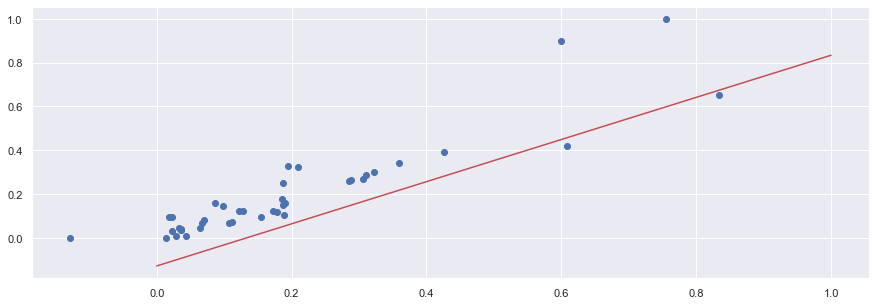

In [33]:
# Đưa ra dự đoán model1
y_predict2 = model2.predict(X_test2)

# điểm thực tế
plt.scatter(y_predict2,y_test2, color='b')

# điểm dự đoán
plt.plot([X_train2.values.reshape(-1,10).min(),X_train2.values.reshape(-1,10).max()],[y_predict2.min(),y_predict2.max()], color='r')
plt.show()

# 7. Xây dựng mô hình bằng chuẩn hóa StandardScaler

In [34]:

s_scaler = StandardScaler()
df_scaled = s_scaler.fit_transform(df)

df_scaled = pd.DataFrame(df_scaled, columns=df_model.columns)

# Tạo tệp Train và test của model 3
X_train_model3, X_test_model3 = train_test_split(df_scaled, train_size = 0.8, test_size=0.2, random_state=0)

# Các biến đầu vào là các thông số kỹ thuật còn lại  đến price
X_train3 = X_train_model3.drop('price', axis=1)
y_train3 = X_train_model3['price']

X_test3 = X_test_model3.drop('price', axis=1)
y_test3 = X_test_model3['price']


# Tạo model Linear Regression
model3 = LinearRegression()

# Chọn 10 thuộc tính tốt nhất
rfe1 = RFE(model3, n_features_to_select=10)
rfe1 = rfe1.fit(X_train3, y_train3)

best_features = X_train3.columns[rfe1.support_]
X_train3 = X_train3[best_features]

# fit model 2
model3.fit(X_train3, y_train3.ravel())

# chọn 10 thuộc tính cho X_test
X_test3 = X_test3[best_features]


# xây dựng mô hình như statsAPI.OLS
exog = sm.add_constant(X_train3)
estimator = sm.OLS(y_train3, exog).fit()
print(estimator.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                     263.8
Date:                Tue, 21 Feb 2023   Prob (F-statistic):           4.38e-91
Time:                        16:45:45   Log-Likelihood:                 10.022
No. Observations:                 164   AIC:                             1.957
Df Residuals:                     153   BIC:                             36.06
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

# Dựng biểu đồ mô hình bằng chuẩn hóa StandardScaler

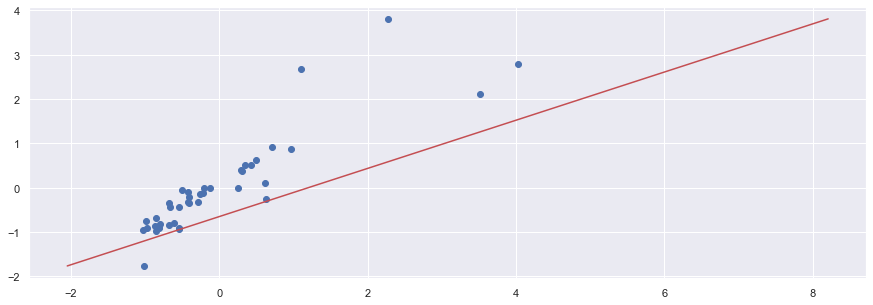

In [35]:
# Đưa ra dự đoán model2
y_predict3 = model3.predict(X_test3)

# điểm thực tế
plt.scatter(y_test3,y_predict3, color='b')

# điểm dự đoán
plt.plot([X_train3.values.reshape(-1,10).min(),X_train3.values.reshape(-1,10).max()],[y_predict3.min(),y_predict3.max()], color='r')
plt.show()

# 8. Đánh giá chất lượng 2 mô hình dựa trên các thông số như R_square, Tổng bình phương sai số trung bình.

In [36]:
# Model mô hình thứ nhất
# thông số R_square model 1

# Tổng bình phương sai số trung bình(MSE) train
y_predict = model2.predict(X_train2)
mse1 = mean_squared_error(y_train2, y_predict)

# Tổng bình phương sai số trung bình(MSE) test
y_predict1 = model2.predict(X_test2)
mse2 = mean_squared_error(y_test2, y_predict1)

# Kết quả của tập Train
print('Kết quả của tập Train model1:')
print('Thông số R_square Train model 1',model2.score(X_train2, y_train2.ravel()))
print("Mean Squared Error Train Model 1:", mse1)
print('MAE Train model1:', mean_absolute_error(y_train2,y_predict))
print("RMSE Train model1:", np.sqrt(mean_squared_error(y_train2, y_predict)))
print('')
# Kết quả của tập Test
print('Kết quả của tập Test model1:')
print('Thông số R_square Test model 1',model2.score(X_test2, y_test2.ravel()))
print("Mean Squared Error Test Model 1:", mse2)
print('MAE Test model1:', mean_absolute_error(y_test2,y_predict1))
print("RMSE Test model1::", np.sqrt(mean_squared_error(y_test2, y_predict1)))

Kết quả của tập Train model1:
Thông số R_square Train model 1 0.9276935477294135
Mean Squared Error Train Model 1: 0.0026749979023608173
MAE Train model1: 0.03919431407011986
RMSE Train model1: 0.05172038188529564

Kết quả của tập Test model1:
Thông số R_square Test model 1 0.8372831182853782
Mean Squared Error Test Model 1: 0.007763245143051718
MAE Test model1: 0.057286681656188124
RMSE Test model1:: 0.08810927955131467


In [37]:
# thông số R_square model 2
# Tổng bình phương sai số trung bình(MSE) train model 2
y_predict2 = model3.predict(X_train3)
mse2 = mean_squared_error(y_train3, y_predict2)

# Tổng bình phương sai số trung bình(MSE) test model 2
y_predict3 = model3.predict(X_test3)
mse3 = mean_squared_error(y_test3, y_predict3)

# Kết quả của tập Train
print('Kết quả của tập Train model2:')
print('R_square train model 2 ',model3.score(X_train3, y_train3.ravel()))
print("Mean Squared Error Train model 2:", mse2)
print('MAE Train model2:', mean_absolute_error(y_train3,y_predict2))
print("RMSE Train model2:", np.sqrt(mean_squared_error(y_train3, y_predict2)))
print('')
# Kết quả của tập Test
print('Kết quả của tập Test model2:')
print('R_square test model 2 ',model3.score(X_test3, y_test3.ravel()))
print("Mean Squared Error test model 2:", mse3)
print('MAE Test model2:', mean_absolute_error(y_test3,y_predict3))
print("RMSE Test model2::", np.sqrt(mean_squared_error(y_test3, y_predict3)))

Kết quả của tập Train model2:
R_square train model 2  0.9451817997270088
Mean Squared Error Train model 2: 0.05181411949224915
MAE Train model2: 0.1751597270877614
RMSE Train model2: 0.22762715016502127

Kết quả của tập Test model2:
R_square test model 2  0.7753759565114566
Mean Squared Error test model 2: 0.27380658259181745
MAE Test model2: 0.32456612215807656
RMSE Test model2:: 0.5232653080339049


## Qua những chỉ số của 2 model chọn 10 thuộc tính tốt nhất thì ta có thể thấy dữ liệu của 2 model gần như tất cả chỉ số bằng nhau chỉ riêng Thông số R_square test model StandardScaler là khác. Nên ta có thể chọn mô hình hồi quy tuyến tính model MinMaxScaler để sử dụng.

# Kết Luận:
- Giá ôtô:
    - Giá ôtô phân khúc giá rẻ (0-10000) USD/Chiếc
    - Giá ôtô phân khúc tầm trung (10000-20000) USD/Chiếc
    - Giá ôtô phân khúc cao cấp từ 20000 USD/Chiếc
- Hãng bán nhiều nhất:
    - Toyota là hãng xe chiếm thị phần cao nhất.
- Nguyên liệu của xe:
    - Số lượng xe chạy bằng nhiên liệu gas chiếm phần lớn. Nhưng động cơ diesel có giá trung bình cao hơn.
- Cửa Xe:
    - Số lượng của xe 2 cửa và 4 cửa cũng không chênh lệch là bao.(4:115 , 2:90)
- Loại hút(aspiration):
    - Loại hút Turbo mặc dù số lượng trên thị trường không nhiều như std nhưng mức giá vẫn có phần nhỉnh hơn.
- Thân xe:
    - Carbody xe thì tập trung ở 2 dạng xe có dùng (sedan, hatchback)
- Số lượng xilanh xe:
    - Số lượng xi lanh cũng có ảnh hưởng đến giá xe.
- Vị trí động cơ:
    - Vị trí enginelocation tập trung nhiều ở (front)
- Loại bánh xe:
    - Đa số các xe ở phân khúc cao cấp sử dụng loại bánh xe rwd, ở các phân khúc thấp hơn thì đa số sử dụng loại bánh fwd.
- Loại động cơ xe:
    - Đa số các xe sử dụng động cơ ohc.
- Hệ thống nguyên liệu của xe:
    - Hệ thống nguyên liệu fuelsystem tập trung ở các dạng xe có (mpfi,2bbl,idi).
- Tốc độ cao nhất của xe:
    - Về tốc độ động cơ cao nhất tập trung các xe khoảng từ 4800-5500.